## Black-Scholes Model for European Options

### Introduction

The Black-Scholes model is a foundational tool in financial engineering, widely used to price European-style options. This document provides an overview of the model's theoretical background, implementation details, and key assumptions.

### Theoretical Background

#### Black-Scholes Formula

The Black-Scholes formula calculates the theoretical price of European call and put options based on several input parameters.

For a **European Call Option**:
$$ C = S_0 \cdot N(d_1) - K \cdot e^{-rT} \cdot N(d_2) $$

For a **European Put Option**:
$$ P = K \cdot e^{-rT} \cdot N(-d_2) - S_0 \cdot N(-d_1) $$

Where:

- $ S_0 $ : The current price of the underlying asset.
- $ K $: The strike price of the option.
- $ r $: The risk-free interest rate (continuously compounded).
- $ T $: The time to expiration, expressed in years.
- $ \sigma $: The volatility of the underlying asset's returns, representing price fluctuations.
- $ N(x) $: The cumulative distribution function of the standard normal distribution.
- $ d_1 $ and $ d_2 $ : Intermediate terms used in calculating $ C $ and $ P $, defined as:

  $$ d_1 = \frac{\ln(S_0 / K) + (r + \sigma^2 / 2)T}{\sigma \sqrt{T}} $$
  $$ d_2 = d_1 - \sigma \sqrt{T} $$

#### Put-Call Parity

Put-Call Parity is a foundational principle for European options, linking the price of a call option and a put option with the same strike price and expiration date:

$$ C + K \cdot e^{-rT} = P + S $$

This relationship helps ensure no arbitrage opportunities exist between call and put options for the same asset.

### Model Assumptions

The Black-Scholes model operates under several key assumptions:

- **No Arbitrage**: There are no risk-free profits available through arbitrage.
- **Efficient Markets**: There are no transaction costs, and the underlying asset is continuously traded.
- **Lognormal Distribution**: The asset prices follow a lognormal distribution.
- **Constant Parameters**: The risk-free interest rate and volatility are known and constant throughout the option's life.
- **European Option**: The option can only be exercised at expiration (not before).

### Import libraries

In [1]:
from scipy.stats import norm
import numpy as np
import plotly.graph_objs as go
from plotly._subplots import make_subplots
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

#### Calculate d1

In [2]:
def calculate_d1(S, K, r, sigma, T):
    """Calculate the d1 term in the Black-Scholes formula."""

    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma * np.sqrt(T))
    
    return d1

#### Calculate d2

In [3]:
def calculate_d2(d1, sigma, T):
    """Calculate the d2 term in the Black-Scholes formula."""

    d2 = d1 - sigma*np.sqrt(T)

    return d2

#### Calculate Call Price

In [4]:
def calculate_call_price(S, K, r, sigma, T):
    """Calculate European Call Option Price"""
    
    d1 = calculate_d1(S, K, r, sigma, T)
    d2 = calculate_d2(d1, sigma, T)

    call_price = S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    
    return call_price

#### Calculate Put Price

In [5]:
def calculate_put_price(S, K, r, sigma, T):
    """Calculate European Put Option Price"""
    
    d1 = calculate_d1(S, K, r, sigma, T)
    d2 = calculate_d2(d1, sigma, T)

    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return put_price

In [6]:
def calculate_option_price(S, K, r, sigma, T, type):
    """ Calculate European Option Price"""

    d1 = calculate_d1(S, K, r, sigma, T)
    d2 = calculate_d2(d1, sigma, T)

    if type.lower() == 'call':
        call_price = S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
        print(f'The Call price is €{call_price:.3f}')
    elif type.lower() == 'put':
        put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        print(f'The Put price is €{put_price:.3f}')
    else: 
        print('Invalid option type. Please choose between call and put.')
    
    return None

In [7]:
def calculate_put_call_parity(S, K, r, sigma, T):

    d1 = calculate_d1(S, K, r, sigma, T)
    d2 = calculate_d2(d1, sigma, T)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    call_parity = call_price + K * np.exp(-r * T)
    put_parity = put_price + S

    if np.isclose(call_parity, put_parity):
        print('Put-Call parity is respected')
    else: 
        print('Put-Call parity is not respected')
        print(f'Call Parity {call_parity}')
        print(f'Put Parity {put_parity}')
        print(f'Difference {call_parity - put_parity:.3f}')

## Calculate Greeks

In [8]:
def calculate_delta(S, K, r, sigma, T, type):

    """
    Calculate the Delta of an option.

    Parameters:
    - S (float): Current stock price
    - K (float): Strike price
    - r (float): Risk-free interest rate
    - sigma (float): Volatility of the underlying asset
    - T (float): Time to maturity (in years)
    - option_type (str): 'call' or 'put'

    Returns:
    - float: Delta of the option
    """

    # Input validation
    if S <= 0 or K <= 0 or r < 0 or sigma < 0 or T < 0:
        raise ValueError('Input parameters must be positive numbers')

    d1 = calculate_d1(S, K, r, sigma, T)

    if type.lower() == 'call':    
        delta = norm.cdf(d1)
    elif type.lower() == 'put':
        delta = norm.cdf(d1) - 1
    else:
        print('Invalid option type. Please choose between call and put.')
        
    return delta

def calculate_gamma(S, K, r, sigma, T):
    """
    Calculate the Gamma of an option using the Black-Scholes model.

    Gamma measures the rate of change of Delta with respect to changes in the underlying asset price.
    It indicates how sensitive the Delta is to the asset price movements.

    Parameters:
    S (float): Current stock price.
    K (float): Strike price.
    r (float): Risk-free interest rate.
    sigma (float): Volatility of the underlying asset.
    T (float): Time to expiration in years.

    Returns:
    float: The Gamma of the option.
    """
    # Input validation
    if S <= 0 or K <= 0 or r < 0 or sigma <= 0 or T <= 0:
        raise ValueError('Input parameters must be positive numbers')

    d1 = calculate_d1(S, K, r, sigma, T)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))

    return gamma

def calculate_vega(S, K, r, sigma, T):
    """
    Calculate the Vega of an option using the Black-Scholes model.

    Vega measures the sensitivity of the option price to changes in the volatility of the underlying asset.
    It represents the amount that the option's price changes in response to a 1% change in volatility.

    Parameters:
    S (float): Current stock price.
    K (float): Strike price.
    r (float): Risk-free interest rate.
    sigma (float): Volatility of the underlying asset.
    T (float): Time to expiration in years.

    Returns:
    float: The Vega of the option.
    """
    # Input validation
    if S <= 0 or K <= 0 or r < 0 or sigma <= 0 or T <= 0:
        raise ValueError('Input parameters must be positive numbers')
    
    d1 = calculate_d1(S, K, r, sigma, T)
    vega = S * norm.pdf(d1) * np.sqrt(T)

    return vega

def calculate_theta(S, K, r, sigma, T, type):
    """
    Calculate the Theta of an option using the Black-Scholes model.

    Theta measures the rate at which the option's value decreases over time, also known as time decay.
    It represents the amount by which the option's price will decrease each day as it approaches expiration.

    Parameters:
    S (float): Current stock price.
    K (float): Strike price.
    r (float): Risk-free interest rate.
    sigma (float): Volatility of the underlying asset.
    T (float): Time to expiration in years.
    type (str): 'call' or 'put' option type.

    Returns:
    float: The Theta of the option.
    """
    # Input validation
    if S <= 0 or K <= 0 or r < 0 or sigma <= 0 or T <= 0:
        raise ValueError('Input parameters must be positive numbers')
    
    d1 = calculate_d1(S, K, r, sigma, T)
    d2 = calculate_d2(S, K, r, sigma, T)

    if type.lower() == 'call':
        theta = (- (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))) \
                - r * K * np.exp(-r * T) * norm.cdf(d2)
    elif type.lower() == 'put':
        theta = (- (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T))) \
                + r * K * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError('Invalid option type. Please choose between "call" and "put".')

    return theta

def calculate_rho(S, K, r, sigma, T, type):
    """
    Calculate the Rho of an option using the Black-Scholes model.

    Rho measures the sensitivity of the option price to changes in the risk-free interest rate.
    It represents the amount that the option's price will change in response to a 1% change in the interest rate.

    Parameters:
    S (float): Current stock price.
    K (float): Strike price.
    r (float): Risk-free interest rate.
    sigma (float): Volatility of the underlying asset.
    T (float): Time to expiration in years.
    type (str): 'call' or 'put' option type.

    Returns:
    float: The Rho of the option.
    """
    # Input validation
    if S <= 0 or K <= 0 or r < 0 or sigma <= 0 or T <= 0:
        raise ValueError('Input parameters must be positive numbers')

    d2 = calculate_d2(S, K, r, sigma, T)
    
    if type.lower() == 'call':
        rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    elif type.lower() == 'put':
        rho = -K * T * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError('Invalid option type. Please choose between "call" and "put".')
    
    return rho

def calculate_greeks(S, K, r, sigma, T, type):
    """
    Calculate all the Greeks (Delta, Gamma, Vega, Theta, Rho) of an option.

    The Greeks measure the sensitivity of the option's price to various factors.

    Parameters:
    S (float): Current stock price.
    K (float): Strike price.
    r (float): Risk-free interest rate.
    sigma (float): Volatility of the underlying asset.
    T (float): Time to expiration in years.
    type (str): 'call' or 'put' option type.

    Returns:
    tuple: Delta, Gamma, Vega, Theta, Rho of the option.
    """
    # Input validation
    if S <= 0 or K <= 0 or r < 0 or sigma <= 0 or T <= 0:
        raise ValueError('Input parameters must be positive numbers')

    if type.lower() == 'call':
        delta = calculate_delta(S, K, r, sigma, T, 'call')
    elif type.lower() == 'put':
        delta = calculate_delta(S, K, r, sigma, T, 'put')
    else:
        raise ValueError('Invalid option type. Please choose between "call" and "put".')

    gamma = calculate_gamma(S, K, r, sigma, T)
    vega = calculate_vega(S, K, r, sigma, T)
    theta = calculate_theta(S, K, r, sigma, T, type)
    rho = calculate_rho(S, K, r, sigma, T, type)
        
    return delta, gamma, vega, theta, rho



#### Visualisation: Delta vs Underlying Price

In [9]:
def plot_deltas(S_min, S_max, K, r, sigma, T):
    """
    Plot Delta for Call and Put options over a range of underlying prices.

    Parameters:
    - S_min (float): Minimum underlying price
    - S_max (float): Maximum underlying price
    - K (float): Strike price
    - r (float): Risk-free interest rate
    - sigma (float): Volatility of the underlying asset
    - T (float): Time to maturity (in years)
    """
    # Validate S_min and S_max
    if S_min >= S_max:
        raise ValueError("S_min must be less than S_max.")
    
    # Generate a range of underlying prices
    s = np.linspace(S_min, S_max, 100)
    
    # Calculate Delta values for Call and Put options
    delta_values_call = [calculate_delta(i, K, r, sigma, T, 'call') for i in s]
    delta_values_put = [calculate_delta(j, K, r, sigma, T, 'put') for j in s]
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot Delta for Call Option
    ax1.plot(s, delta_values_call, label='Delta Call', color='red')
    ax1.set_title('Delta of Call Option vs. Underlying Price')
    ax1.set_xlabel('Underlying Price (S)')
    ax1.set_ylabel('Delta Call (Δ)')
    ax1.legend()
    ax1.grid(True)
    
    # Plot Delta for Put Option
    ax2.plot(s, delta_values_put, label='Delta Put', color='blue')
    ax2.set_title('Delta of Put Option vs. Underlying Price')
    ax2.set_xlabel('Underlying Price (S)')
    ax2.set_ylabel('Delta Put (Δ)')
    ax2.legend()
    ax2.grid(True)
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Define interactive widgets
S_min_slider = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='S Min:')
S_max_slider = widgets.FloatSlider(value=80, min=10, max=200, step=1, description='S Max:')
K_slider = widgets.FloatSlider(value=50, min=10, max=150, step=1, description='Strike Price (K):')
r_slider = widgets.FloatSlider(value=0.04, min=0.0, max=0.10, step=0.001, description='Interest Rate (r):')
sigma_slider = widgets.FloatSlider(value=0.20, min=0.05, max=0.60, step=0.01, description='Volatility (σ):')
T_slider = widgets.FloatSlider(value=0.10, min=0.01, max=2.00, step=0.01, description='Time to Maturity (T):')

# Arrange widgets in a grid
ui = widgets.VBox([
    widgets.HBox([S_min_slider, S_max_slider]),
    K_slider,
    r_slider,
    sigma_slider,
    T_slider
])

# Link widgets to the plotting function
out = widgets.interactive_output(plot_deltas, {
    'S_min': S_min_slider,
    'S_max': S_max_slider,
    'K': K_slider,
    'r': r_slider,
    'sigma': sigma_slider,
    'T': T_slider
})

# Display the widgets and the output
display(ui, out)

Output()

### Visualisation: Gamma vs underlying Price

In [ ]:
def plot_gamma(S_min, S_max, K, r, sigma, T):
    """
    Plot Delta for Call and Put options over a range of underlying prices.

    Parameters:
    - S_min (float): Minimum underlying price
    - S_max (float): Maximum underlying price
    - K (float): Strike price
    - r (float): Risk-free interest rate
    - sigma (float): Volatility of the underlying asset
    - T (float): Time to maturity (in years)
    """
    # Validate S_min and S_max
    if S_min >= S_max:
        raise ValueError("S_min must be less than S_max.")
    
    # Generate a range of underlying prices
    s = np.linspace(S_min, S_max, 100)
    
    # Calculate Delta values for Call and Put options
    gamma_values = [calculate_gamma(i, K, r, sigma, T) for i in s]
    
    # Plot Gamma for Euorpean Option
    plt.figure(figsize=(16,8))
    plt.plot(s, gamma_values, label = 'Gamma Call', color='red')
    plt.title('Gamma Euopean Option vs. Underlying Price')
    plt.xlabel('Underlying Price (S)')
    plt.ylabel('Gamma')
    plt.legend()
    plt.grid(True)
    
    # Adjust layout and display the plots
    plt.show()

# Define interactive widgets
S_min_slider = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='S Min:')
S_max_slider = widgets.FloatSlider(value=80, min=10, max=200, step=1, description='S Max:')
K_slider = widgets.FloatSlider(value=50, min=10, max=150, step=1, description='Strike Price (K):')
r_slider = widgets.FloatSlider(value=0.04, min=0.0, max=0.10, step=0.001, description='Interest Rate (r):')
sigma_slider = widgets.FloatSlider(value=0.20, min=0.05, max=0.60, step=0.01, description='Volatility (σ):')
T_slider = widgets.FloatSlider(value=0.10, min=0.01, max=2.00, step=0.01, description='Time to Maturity (T):')

# Arrange widgets in a grid
ui = widgets.VBox([
    widgets.HBox([S_min_slider, S_max_slider]),
    K_slider,
    r_slider,
    sigma_slider,
    T_slider
])

# Link widgets to the plotting function
out = widgets.interactive_output(plot_gamma, {
    'S_min': S_min_slider,
    'S_max': S_max_slider,
    'K': K_slider,
    'r': r_slider,
    'sigma': sigma_slider,
    'T': T_slider
})

# Display the widgets and the output
display(ui, out)

Output()

### Visualization: Vega vs Underlying Price

In [11]:
def plot_vega(S_min, S_max, K, r, sigma, T):
    """
    Plot Vega European options over a range of underlying prices.

    Parameters:
    - S_min (float): Minimum underlying price
    - S_max (float): Maximum underlying price
    - K (float): Strike price
    - r (float): Risk-free interest rate
    - sigma (float): Volatility of the underlying asset
    - T (float): Time to maturity (in years)
    """

    # Validate S_min and S_max
    if S_min >= S_max:
        raise ValueError("S_min must be less than S_max.")
    
    # Generate a range of underlying prices
    s = np.linspace(S_min, S_max, 100)
    
    # Calculate Delta values for Call and Put options
    vega_values = [calculate_vega(i, K, r, sigma, T) for i in s]
    
    # Plot Gamma for Euorpean Option
    plt.figure(figsize=(16,8))
    plt.plot(s, vega_values, label = 'Vega Call', color='orange')
    plt.title('Vega Euopean Option vs. Underlying Price')
    plt.xlabel('Underlying Price (S)')
    plt.ylabel('Vega')
    plt.legend()
    plt.grid(True)
    
    # Adjust layout and display the plots
    plt.show()

# Define interactive widgets
S_min_slider = widgets.FloatSlider(value=10, min=1, max=100, step=1, description='S Min:')
S_max_slider = widgets.FloatSlider(value=80, min=10, max=200, step=1, description='S Max:')
K_slider = widgets.FloatSlider(value=50, min=10, max=150, step=1, description='Strike Price (K):')
r_slider = widgets.FloatSlider(value=0.04, min=0.0, max=0.10, step=0.001, description='Interest Rate (r):')
sigma_slider = widgets.FloatSlider(value=0.20, min=0.05, max=1, step=0.01, description='Volatility (σ):')
T_slider = widgets.FloatSlider(value=0.10, min=0.01, max=2.00, step=0.01, description='Time to Maturity (T):')

# Arrange widgets in a grid
ui = widgets.VBox([
    widgets.HBox([S_min_slider, S_max_slider]),
    K_slider,
    r_slider,
    sigma_slider,
    T_slider
])

# Link widgets to the plotting function
out = widgets.interactive_output(plot_vega, {
    'S_min': S_min_slider,
    'S_max': S_max_slider,
    'K': K_slider,
    'r': r_slider,
    'sigma': sigma_slider,
    'T': T_slider
})

# Display the widgets and the output
display(ui, out)

Output()

### Option Price vs Underlying Price and Volatility

In [40]:
def plot_3D_vol(S_min, S_max, K, r, T):
    """Function that plots call option price and Vega against volatility and underlying price."""

    if S_max <= S_min:
        raise ValueError('S_max has to be greater than S_min')
     
    s = np.linspace(S_min, S_max, 100)       # Underlying prices
    sigma = np.linspace(0.1, 1, 100)         # Volatilities
    
    # Calculate call price and Vega for each (s, sigma) pair
    call_price = [calculate_call_price(i, K, r, j, T) for i in s for j in sigma]

    # Create a meshgrid for underlying price and volatility
    S, Sigma = np.meshgrid(s, sigma)
    
    # Reshape call_price and vega to match the meshgrid dimensions
    Call_Price = np.array(call_price).reshape(len(sigma), len(s))
    
    # Example: Plot Call Price vs Underlying Price and Volatility
    fig = go.Figure(data=[go.Surface(x=S, y=Sigma, z=Call_Price, colorscale='Plasma')])

    fig.update_layout(
        title='Call Option Price vs Underlying Price and Volatility',
        scene=dict(
            xaxis_title='Underlying Price (S)',
            yaxis_title='Volatility (σ)',
            zaxis_title='Call Option Price'
        ),
        autosize=False,
        width=800,
        height=800
    )

    fig.show()

# Example function calls (ensure calculate_call_price and calculate_vega are defined)
plot_3D_vol(10, 60, 30, 0.02, 0.3)

### Option Price vs underlying value vs time to expiraton

In [41]:
def plot_3D_time(S_min, S_max, K, r, sigma):
    
    if S_max <= S_min:
        raise ValueError('S_max has to be greater than S_min')
    
    # Generate several underlying prices
    s = np.linspace(S_min, S_max, 150)
    t = np.linspace(0.05, 2, 150)
    
    # Calculate option price
    option_price = [calculate_call_price(i, K, r, sigma, j) for i in s for j in t]

    S, T = np.meshgrid(s, t)

    # Reshape Call Price
    option_price = np.array(option_price).reshape(len(s), len(t))

    fig = go.Figure(data=[go.Surface(x=S, y=T, z=option_price, colorscale='Magma')])

    fig.update_layout(
        title='Call price against underlying value and time to expiration',
        scene=dict(
            xaxis_title='Underlying Value',
            yaxis_title='Time to Expiration',
            zaxis_title='Option Price'),
        width=800,
        height=800,
        autosize=False
    )

    fig.show()

plot_3D_time(10, 60, 30, 0.02, 0.3)


#### Visualizing gamma

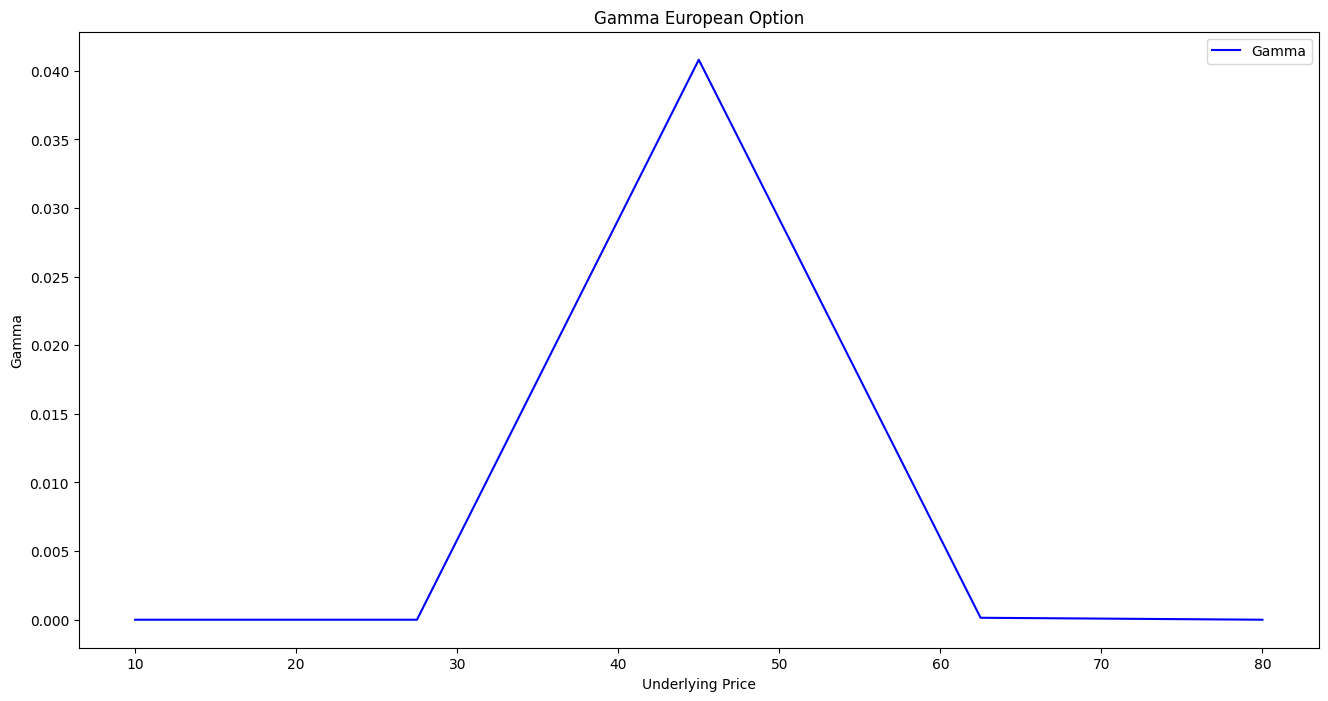

In [ ]:
s = np.linspace(10,80,5) # underlying price
k = 50 # strike price
r = 0.04 # interest rate
sigma = 0.20 # volatility
t = 0.10 # time to maturity 

gamma_values = [calculate_gamma(i, k, r, sigma, t) for i in s]

plt.figure(figsize=(16,8))
plt.plot(s, gamma_values, label = 'Gamma', color = 'blue')
plt.title('Gamma European Option')
plt.xlabel('Underlying Price')
plt.ylabel('Gamma')
plt.legend()
plt.show()

#### Visualizing Vega

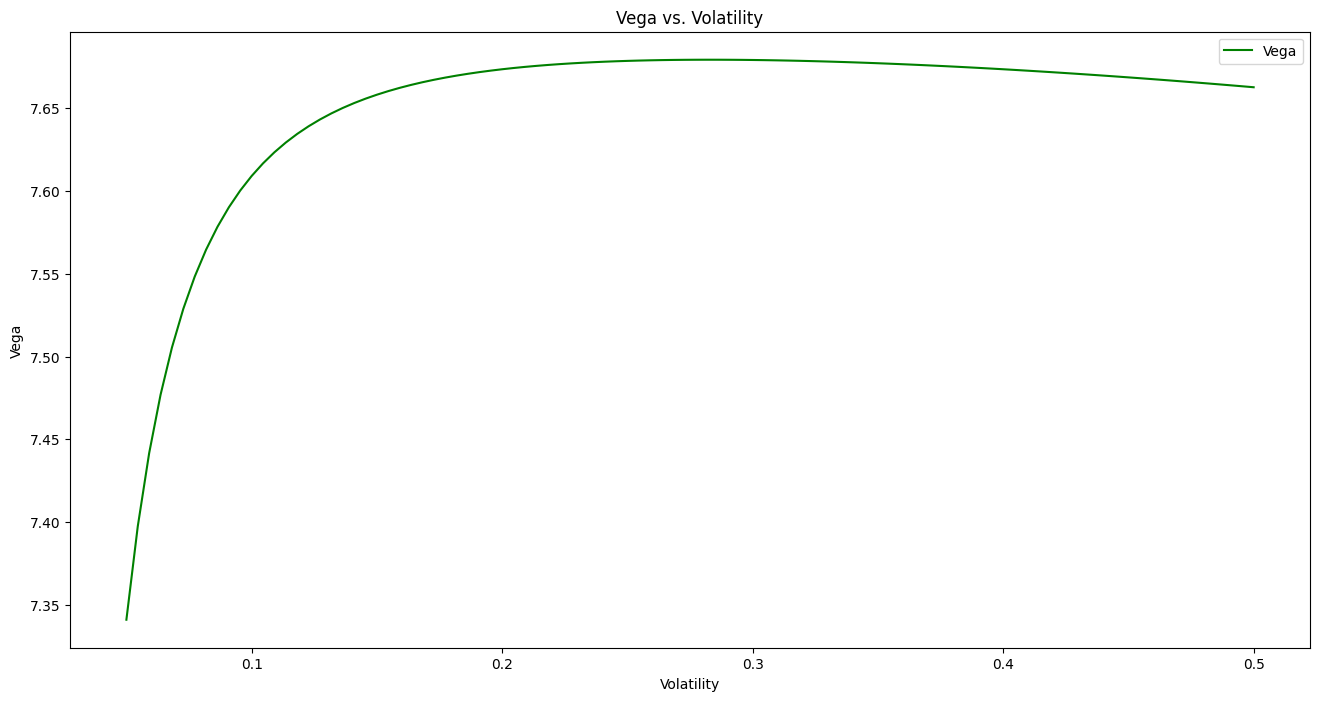

In [ ]:
s = 50 # underlying price
k = 50 # strike price
r = 0.04 # interest rate
sigma = np.linspace(0.05,0.5,100) # volatility
t = 0.15 # time to maturity 

vega_values = [calculate_vega(s, k, r, i, t) for i in sigma]

plt.figure(figsize=(16,8))
plt.plot(sigma, vega_values, label = 'Vega', color = 'green')
plt.title('Vega vs. Volatility')
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.legend()
plt.show()